In [141]:
# initialisation
import pandas as pd

data_wd = 'Datasets\\'
dict_wd = 'Dictionary\\'
out_wd = 'Output\\'

In [142]:
# import the data
raw_data = pd.read_csv(out_wd + 'word_flag.csv')
raw_data.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
data = raw_data.copy()

In [143]:
data.head()

,airline_sentiment,text,word_count,tokens,word_tag,no_nouns
0,neutral,what said.,2,said,said/VBD,0
1,positive,plus you've added commercials to the experienc...,8,plus added commercials experience tacky,plus/CC added/JJ commercials/NNS experience/NN...,2
2,neutral,i didn't today... must mean i need to take ano...,11,today must mean need take another trip,today/NN must/MD mean/VB need/MD take/VB anoth...,2
3,negative,"it's really aggressive to blast obnoxious ""ent...",16,really aggressive blast obnoxious entertainmen...,really/RB aggressive/JJ blast/NN obnoxious/JJ ...,3
4,negative,and it's a really big bad thing about it,9,really big bad thing,really/RB big/JJ bad/JJ thing/NN,1


In [144]:
# remove the emoji
def removeNonEn(intext):
    content = ''
    for char in str(intext):
        if u'a' <= char <= u'z':
            content = content + char
        elif char == ' ':
            content = content + char
    return content

data['tokens_clean'] = data.tokens.apply(removeNonEn)

In [145]:
tokens_list = data.tokens_clean.tolist()
len(tokens_list)

14427

In [146]:
word_dict = {}
for each in tokens_list:
    words = each.split()
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1


word_keys = [each[0] for each in sorted(word_dict.items(), key=lambda x: x[1], reverse=True)]
word_values = [each[1] for each in sorted(word_dict.items(), key=lambda x: x[1], reverse=True)]
word_freq = pd.DataFrame({'word': word_keys, 'frequency': word_values})

In [147]:
word_freq.to_csv(out_wd + 'word_freq.csv', encoding='utf-8')

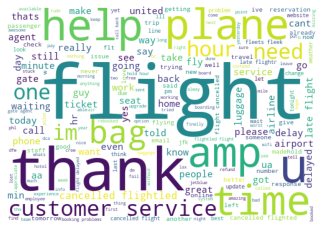

In [148]:
# get the string of all the words
content = data.tokens_clean.to_list()
content = ' '.join(content)
# draw the word cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud(
    background_color='white',
    width=500,
    height=350,
    )
wc.generate(content)
wc.to_file(out_wd + 'cloud.png')
plt.imshow(wc)
plt.axis('off')
plt.show()